In [1]:
# importing libraries
import pandas as pd

In [2]:
# read tsv file
df=pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# data preprocessing

In [5]:
# lower case

In [6]:
df['Review']=df['Review'].str.lower()

In [7]:
df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [8]:
## removing punctuations

In [9]:
import string
string.punctuation
exclude=string.punctuation

In [10]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punc(x):
  for i in exclude:
    x=x.replace(i,' ')
  return x

In [12]:
df['Review']=df['Review'].apply(remove_punc)

In [13]:
df.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [14]:
# feature extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tf=TfidfVectorizer()
x=tf.fit_transform(df['Review']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
x.shape

(1000, 2035)

In [18]:
y=df['Liked']

In [19]:
y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


In [20]:
## train test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [23]:
xtrain.shape

(800, 2035)

In [24]:
## Build neural networks

In [25]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [26]:
model=Sequential()

# add an input layer
model.add(Input(shape=(xtrain.shape[1],)))

# create dense layer 1
model.add(Dense(units=128,activation='relu'))

# add dropout layer
model.add(Dropout(rate=0.5))

# create dense layer 2
model.add(Dense(units=64,activation='relu'))

# add dropout layer
model.add(Dropout(rate=0.4))

# add output layer
model.add(Dense(units=1,activation='sigmoid'))


In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
es=EarlyStopping(monitor='val_loss',patience=15)

In [29]:
hist=model.fit(xtrain,ytrain,validation_split=0.1,epochs=200,callbacks=[es])

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.5336 - loss: 0.6919 - val_accuracy: 0.6000 - val_loss: 0.6891
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6438 - loss: 0.6810 - val_accuracy: 0.6250 - val_loss: 0.6785
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7650 - loss: 0.6548 - val_accuracy: 0.8000 - val_loss: 0.6409
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.5768 - val_accuracy: 0.8375 - val_loss: 0.5497
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9316 - loss: 0.4152 - val_accuracy: 0.8250 - val_loss: 0.4314
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9600 - loss: 0.2343 - val_accuracy: 0.8375 - val_loss: 0.3620
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9831 - loss: 0.1229 - val_accuracy: 0.8375 - val_loss: 0.3569
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0627 - val_accuracy: 0.8250 -

In [30]:
# predictions

In [31]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [32]:
yprob_train[:5]

array([[9.9986732e-01],
       [9.9992871e-01],
       [9.3178089e-05],
       [2.5066716e-04],
       [9.9995136e-01]], dtype=float32)

In [33]:
ypred_tr=[]
for i in yprob_train:
  if i<0.5:
    ypred_tr.append(0)
  else:
    ypred_tr.append(1)

In [34]:
ypred_tr[:5]

[1, 1, 0, 0, 1]

In [35]:
ypred_ts=[]
for i in yprob_test:
  if i<0.5:
    ypred_ts.append(0)
  else:
    ypred_ts.append(1)

In [36]:
ypred_ts[:5]

[1, 0, 1, 0, 0]

In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

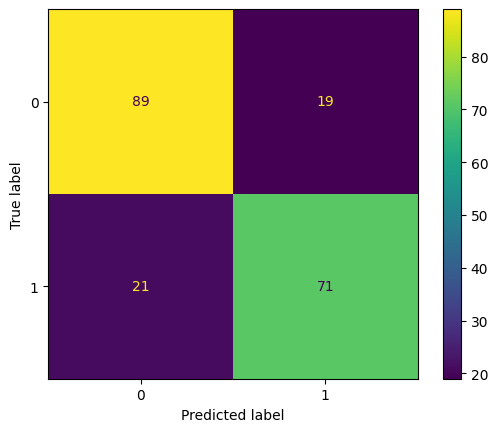

In [38]:
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [39]:
st=input('enter your review ')
st1=st.lower()
strm=remove_punc(st1)
sttf=tf.transform([strm]).toarray()


enter your review Fantastic!


In [40]:
pred=model.predict([sttf])

if pred>0.5:
  print('positive review')
else:
  print('negative review')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
positive review
